# Diplomado de ciencia de datos 24004
## Proyecto modulo 2 Procesamiento de datos con Python 
## Crédito Personal
## Alumno: Antonio de Jesús Muñoz Hernández

## Introducción

Los bancos son entidades que se organizan de acuerdo a leyes especiales y que se dedican a trabajar con el dinero, para lo cual reciben y tienen a su custodia depósitos hechos por las personas y las empresas, y otorgan préstamos usando esos mismos recursos, actividad que se denomina intermediación financiera, y en este proyecto busca a que personas puede enfocarse para ofrecer un préstamo.

## Planteamiento del problema

La última campaña de créditos personales del banco tuvo una baja tasa de aceptación del 9%. El reto es identificar qué características financieras de los clientes que influyen en su decisión de aceptar estas ofertas.

## Objetivo general 

* Realizar limpieza de datos en pandas a un csv por medio de la plataforma Visual Studio Code
* Realizar funciones vectorizadas para ver como se comportan los datos


## Desarrollo

En primera instancia se importa la libreria de pandas con alias pd y se leé el archivo csv que se tenía previamente cargado en la carpeta que se está trabajando; por último se le da lectura a la información del archivo.

In [32]:
import pandas as pd
import numpy as np
df = pd.read_csv("./Model_credito_modificado.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  5000 non-null   int64  
 1   Experience          5000 non-null   int64  
 2   Income              5000 non-null   int64  
 3   ZIP Code            5000 non-null   int64  
 4   CCAvg               5000 non-null   float64
 5   Education           5000 non-null   int64  
 6   Mortgage            5000 non-null   int64  
 7   Personal Loan       5000 non-null   int64  
 8   Securities Account  5000 non-null   int64  
 9   CD Account          5000 non-null   int64  
 10  Online              5000 non-null   int64  
 11  CreditCard          5000 non-null   int64  
dtypes: float64(1), int64(11)
memory usage: 468.9 KB


Se hace una copia del DataFrame para no modificar el original, se crea un diccionario para renombrar campos y le da lectura a las primeras 10 filas para comprobar. 

In [3]:
df_copy = df.copy()
datos = {"ID":"id_cliente",
         "Experience":"experiencia_años",
         "Income":"ingreso_anual",
         "ZIP Code":"zip_code",
         "CCAvg":"avg_gastos_mes",
         "Education":"educacion",
         "Mortgage":"valor_hipoteca",
         "Personal Loan":"prestamo",
         "Securities Account":"cuenta_activos_financieros",
         "CD Account":"cuenta_certificada",
         "Online":"enlinea",
         "CreditCard":"tarjeta_credito"}
df_copy.rename(columns=datos, inplace=True)
df_copy.head(10)

,id_cliente,experiencia_años,ingreso_anual,zip_code,avg_gastos_mes,educacion,valor_hipoteca,prestamo,cuenta_activos_financieros,cuenta_certificada,enlinea,tarjeta_credito
0,1,1,49,91107,1.6,1,0,0,1,0,0,0
1,2,19,34,90089,1.5,1,0,0,1,0,0,0
2,3,15,11,94720,1.0,1,0,0,0,0,0,0
3,4,9,100,94112,2.7,2,0,0,0,0,0,0
4,5,8,45,91330,1.0,2,0,0,0,0,0,1
5,6,13,29,92121,0.4,2,155,0,0,0,1,0
6,7,27,72,91711,1.5,2,0,0,0,0,1,0
7,8,24,22,93943,0.3,3,0,0,0,0,0,1
8,9,10,81,90089,0.6,2,104,0,0,0,1,0
9,10,9,180,93023,8.9,3,0,1,0,0,0,0


Se verifican los valores nulos y duplicados.

In [4]:
nulos = df_copy.isnull().sum()
duplicados = df_copy.duplicated().sum()
print(nulos)
print(f"Valores duplicados en el DataFrame {duplicados}")


id_cliente                    0
experiencia_años              0
ingreso_anual                 0
zip_code                      0
avg_gastos_mes                0
educacion                     0
valor_hipoteca                0
prestamo                      0
cuenta_activos_financieros    0
cuenta_certificada            0
enlinea                       0
tarjeta_credito               0
dtype: int64
Valores duplicados en el DataFrame 0


Se hace un conteo de los valor que tiene 1 ó 0 como dato y los que no se toma una media o mediana.

In [5]:
clientes_prestamo = df_copy['prestamo'].sum()
print(f"Este es el total de los clientes con prestamo: {clientes_prestamo}-{clientes_prestamo*100/5000} %\n_________________")

df_pretamo_true = df_copy[df_copy['prestamo'] > 0]
avg_experiencia_años = df_pretamo_true['experiencia_años'].mean()
print(f"Esta es la media de años de los clientes con prestamo: {avg_experiencia_años}\n_________________")

avg_ingreso_anual = df_pretamo_true['ingreso_anual'].mean()
print(f"Esta es la media en dolares de ingresos anuales de los clientes con prestamo: {avg_experiencia_años}\n_________________")

mediana_gastos_mes = df_pretamo_true['avg_gastos_mes'].median()
print(f"Esta es la mediana en dolares de los gastos por mes de los clientes con prestamo: {mediana_gastos_mes}\n_________________")

valor_hipoteca = df_pretamo_true[df_pretamo_true['valor_hipoteca']>0].count()
num_valor_hipoteca = valor_hipoteca['valor_hipoteca'].sum()
print(f"Este es el número de clientes con prestamo  que tienen hipoteca: {num_valor_hipoteca}-{num_valor_hipoteca*100/5000} %\n_________________")

cuenta_activos_financieros = df_pretamo_true['cuenta_activos_financieros'].sum()
print(f"Este es el número de clientes con prestamo que tienen cuenta con activos financieros: {cuenta_activos_financieros}-{cuenta_activos_financieros*100/5000} %\n_________________")

cuenta_certificada = df_pretamo_true['cuenta_certificada'].sum()
print(f"Este es el número clientes con cuenta certificada: {cuenta_certificada}-{cuenta_certificada*100/5000} %\n_________________")

numero_clientes_enlinea = df_pretamo_true['enlinea'].sum()
print(f"Este es el número clientes con movimientos en linea: {numero_clientes_enlinea}-{numero_clientes_enlinea*100/5000} %\n_________________")

tarjeta_credito = df_pretamo_true['tarjeta_credito'].sum()
print(f"Este es el número clientes que utilizan tarjeta de crédito : {tarjeta_credito}-{tarjeta_credito*100/5000} %\n_________________")



Este es el total de los clientes con prestamo: 480-9.6 %
_________________
Esta es la media de años de los clientes con prestamo: 19.84375
_________________
Esta es la media en dolares de ingresos anuales de los clientes con prestamo: 19.84375
_________________
Esta es la mediana en dolares de los gastos por mes de los clientes con prestamo: 3.8
_________________
Este es el número de clientes con prestamo  que tienen hipoteca: 168-3.36 %
_________________
Este es el número de clientes con prestamo que tienen cuenta con activos financieros: 60-1.2 %
_________________
Este es el número clientes con cuenta certificada: 140-2.8 %
_________________
Este es el número clientes con movimientos en linea: 291-5.82 %
_________________
Este es el número clientes que utilizan tarjeta de crédito : 143-2.86 %
_________________


Del campo de la educación de los clientes que se divide en 3 categorías, se toma el valor correspondiente de cada categoría que tiene prestamos.

In [6]:
df_educacion = df_pretamo_true[df_pretamo_true['educacion'] == 3]
profesionales_prestamo = df_educacion['educacion'].count()
print(f"Este es el número clientes profesionales con prestamo : {profesionales_prestamo}-{profesionales_prestamo*100/5000} %\n_________________")

df_educacion = df_pretamo_true[df_pretamo_true['educacion'] == 2]
graduados_prestamo = df_educacion['educacion'].count()
print(f"Este es el número clientes graduados con prestamo : {graduados_prestamo}-{graduados_prestamo*100/5000} %\n_________________")

df_educacion = df_pretamo_true[df_pretamo_true['educacion'] == 1]
comun_prestamo = df_educacion['educacion'].count()
print(f"Este es el número clientes graduados con prestamo : {comun_prestamo}-{comun_prestamo*100/5000} %\n_________________")



Este es el número clientes profesionales con prestamo : 205-4.1 %
_________________
Este es el número clientes graduados con prestamo : 182-3.64 %
_________________
Este es el número clientes graduados con prestamo : 93-1.86 %
_________________


Se grafícan los valores para observar visualmente que nos arrojan.

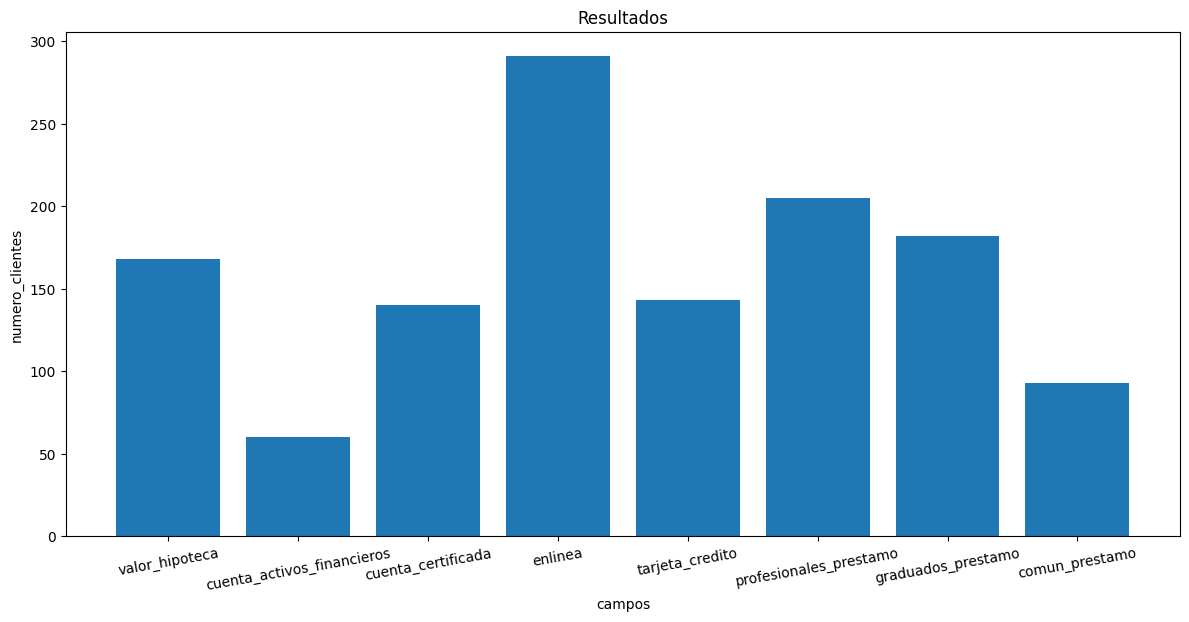

In [27]:
import matplotlib.pyplot as plt

# Diccionario de ejemplo
datos = {"valor_hipoteca":num_valor_hipoteca,
         "cuenta_activos_financieros":cuenta_activos_financieros,
         "cuenta_certificada":cuenta_certificada,
         "enlinea":numero_clientes_enlinea,
         "tarjeta_credito":tarjeta_credito,
         "profesionales_prestamo":profesionales_prestamo,
         "graduados_prestamo":graduados_prestamo,
         "comun_prestamo":comun_prestamo
         }

# Convertir el diccionario en listas
campos = list(datos.keys())
numero_clientes = list(datos.values())

plt.figure(figsize=(12, 6)) 

plt.bar(campos,numero_clientes)

# Añadir un título
plt.ylabel("numero_clientes")
plt.xlabel("campos")
plt.title('Resultados')
plt.tight_layout()
plt.xticks(rotation=10)
# Mostrar el gráfico
plt.show()

Esta es la media de años de los clientes con prestamo: 19.84375
_________________
Esta es la media en dolares de ingresos anuales de los clientes con prestamo: 19.84375
_________________
Esta es la mediana en dolares de los gastos por mes de los clientes con prestamo: 3.8

In [29]:
df_copy1 = df_copy.copy()
df_copy1.head(10)

,id_cliente,experiencia_años,ingreso_anual,zip_code,avg_gastos_mes,educacion,valor_hipoteca,prestamo,cuenta_activos_financieros,cuenta_certificada,enlinea,tarjeta_credito
0,1,1,49,91107,1.6,1,0,0,1,0,0,0
1,2,19,34,90089,1.5,1,0,0,1,0,0,0
2,3,15,11,94720,1.0,1,0,0,0,0,0,0
3,4,9,100,94112,2.7,2,0,0,0,0,0,0
4,5,8,45,91330,1.0,2,0,0,0,0,0,1
5,6,13,29,92121,0.4,2,155,0,0,0,1,0
6,7,27,72,91711,1.5,2,0,0,0,0,1,0
7,8,24,22,93943,0.3,3,0,0,0,0,0,1
8,9,10,81,90089,0.6,2,104,0,0,0,1,0
9,10,9,180,93023,8.9,3,0,1,0,0,0,0


In [47]:
df_copy1['candidatos']= np.where((df_copy1['enlinea']>0) & (df_copy1['educacion']==3),1,0)
df_copy1.head(10)


,id_cliente,experiencia_años,ingreso_anual,zip_code,avg_gastos_mes,educacion,valor_hipoteca,prestamo,cuenta_activos_financieros,cuenta_certificada,enlinea,tarjeta_credito,candidatos
0,1,1,49,91107,1.6,1,0,0,1,0,0,0,0
1,2,19,34,90089,1.5,1,0,0,1,0,0,0,0
2,3,15,11,94720,1.0,1,0,0,0,0,0,0,0
3,4,9,100,94112,2.7,2,0,0,0,0,0,0,0
4,5,8,45,91330,1.0,2,0,0,0,0,0,1,0
5,6,13,29,92121,0.4,2,155,0,0,0,1,0,0
6,7,27,72,91711,1.5,2,0,0,0,0,1,0,0
7,8,24,22,93943,0.3,3,0,0,0,0,0,1,0
8,9,10,81,90089,0.6,2,104,0,0,0,1,0,0
9,10,9,180,93023,8.9,3,0,1,0,0,0,0,0


In [51]:
df_candidatos_true= df_copy1[df_copy1['candidatos']==1]
df_candidatos_true.head()

,id_cliente,experiencia_años,ingreso_anual,zip_code,avg_gastos_mes,educacion,valor_hipoteca,prestamo,cuenta_activos_financieros,cuenta_certificada,enlinea,tarjeta_credito,candidatos
15,16,30,22,95054,1.5,3,0,0,0,0,1,1,1
21,22,27,63,90095,2.0,3,0,0,0,0,1,0,1
28,29,30,48,94539,2.2,3,0,0,0,0,1,1,1
30,31,35,35,93106,1.2,3,122,0,0,0,1,0,1
34,35,5,50,94035,1.8,3,0,0,0,0,1,0,1


In [53]:
df_candidatos_true.info()

<class 'pandas.core.frame.DataFrame'>
Index: 869 entries, 15 to 4995
Data columns (total 13 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   id_cliente                  869 non-null    int64  
 1   experiencia_años            869 non-null    int64  
 2   ingreso_anual               869 non-null    int64  
 3   zip_code                    869 non-null    int64  
 4   avg_gastos_mes              869 non-null    float64
 5   educacion                   869 non-null    int64  
 6   valor_hipoteca              869 non-null    int64  
 7   prestamo                    869 non-null    int64  
 8   cuenta_activos_financieros  869 non-null    int64  
 9   cuenta_certificada          869 non-null    int64  
 10  enlinea                     869 non-null    int64  
 11  tarjeta_credito             869 non-null    int64  
 12  candidatos                  869 non-null    int64  
dtypes: float64(1), int64(12)
memory usage:

## Programa de gestión de clientes 

In [1]:
def menu():
    print("""Bienvenido al servicio de gestión de clientes
1) Agregar cliente
2) Eliminar cliente
3) Salir
                """)
lista_de_clientes = []
lista_interna = []
menu()
while True:
    while True:
        try:
            accion = int(input("Selecciona la acción que deseas realizar: "))
            if accion > 0 and accion <=3:
                break
            else:
                print("Ingresa un número del 1-3")
        except ValueError:
            print("Esa opción no es valida")
    match accion:
        case  1:
            while True:
                id_cliente = int(input("Ingresa el ID del cliente: "))
                experiencia_años = int(input("Ingresa la experiencia en años: "))
                ingreso_anual = int(input("Ingresa el ingreso anual: "))
                zip_code = int(input("Ingresa el zip code: "))
                avg_gastos_mes = float(input("Ingresa el promedio de gastos por mes: "))
                educacion = int(input("""Ingresa el nivel de estudios del cliente: 1)Comun
                                    2) Egresado
                                    3) Profesional :"""))
                valor_hipoteca=int(input("Ingresa el valor de la hipoteca en caso de tener: "))
                prestamo = int(input("Ingresa un 1 si el cliente cuenta con un prestamo y 0 si no tiene: "))
                cuenta_activos_financieros = int(input("Ingresa un 1 si el cliente tiene cuenta con activos financieros y 0 si no tiene: "))
                cuenta_certificada = int(input("Ingresa un 1 si el cliente tiene cuenta certificada y 0 si no tiene: "))
                enlinea = int(input("Ingresa un 1 si el cliente trabaja la banca en linea y 0 si no tiene: "))
                tarjeta_credito  = int(input("Ingresa un 1 si el cliente cuenta con tarjeta de crédito y 0 si no tiene: "))
                lista_interna = [id_cliente,experiencia_años,ingreso_anual,zip_code,avg_gastos_mes,educacion,valor_hipoteca,prestamo,cuenta_activos_financieros,cuenta_certificada,enlinea,tarjeta_credito]
                lista_de_clientes.append(lista_interna)
                print(f"El cliente {lista_interna} se ha agregado exitosamente.")
                seguir_o_no = input("Desea seguir agregando más clientes: SI/NO").upper()
                if seguir_o_no == "SI":
                    continue
                else:
                    break
        case 2:
            id_eliminar = int(input("Ingresa el id del cliente que desea eliminar"))
            for dato in lista_de_clientes:
                if id_eliminar in dato:
                    indice_a_eliminar = lista_de_clientes.index(dato)
                    lista_de_clientes.pop(indice_a_eliminar)
                    print(f"El cliente con id {id_eliminar} se ha eliminado exitosamente.")
                else:
                    print(f"El indice {id_eliminar} no se ha encontrado en la lista de clientes.")
        case 3:
            print(f"____________________________________________________\nEsta es la lista de clientes que se han registrado {lista_de_clientes}")
            print("Saliendo del gestor")
            break

Bienvenido al servicio de gestión de clientes
1) Agregar cliente
2) Eliminar cliente
3) Salir
                
El cliente [12, 2233, 22, 33344, 23.0, 2, 334, 1, 0, 1, 1, 1] se ha agregado exitosamente.
El cliente con id 12 se ha eliminado exitosamente.
____________________________________________________
Esta es la lista de clientes que se han registrado []
Saliendo del gestor
